<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

<div class="alert alert-block alert-success">
<b>Комментарий ревьюера №1</b> ✅
    
Хорошее начало! С содержанием ориентироваться в проекте намного проще👍 Можно добавить описание данных
</div>

## Загрузка данных

Импортируем необходимые библиотеки и загрузим данные из CSV-файла:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [2]:
try:
    df = pd.read_csv('/datasets/insurance.csv')
except:
    df = pd.read_csv('insurance.csv')

Теперь изучим датасет, используя методы .head() и .info(). Это позволит получить общее представление о данных, проверить типы данных и выявить возможные пропущенные значения.

In [3]:
display(df.head())
df.info()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


Пропущенных значений в датасете нет.

Набор данных содержит:
- Признаки: пол, возраст и зарплата застрахованного, количество членов его семьи.
- Целевой признак: количество страховых выплат клиенту за последние 5 лет.

Приведем столбцы `Возраст` и `Зарплата` к типу данных `int`.

In [4]:
df['Возраст'] = df['Возраст'].astype('int')
df['Зарплата'] = df['Зарплата'].astype('int')

Проверим наличие дубликатов:

In [5]:
print("Количество дубликатов:", df.duplicated().sum())
df = df.drop_duplicates().reset_index(drop=True)

Количество дубликатов: 153


<div class="alert alert-success">
<b>Комментарий ревьюера №1</b> ✅
    
Так как у нас нет id клиента и у нас мало столбцов и они достаточно общие, поэтому вполне возможно, что это не дубликаты, а просто совпадающие данные.
</div>

Статистический анализ данных:

In [6]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811223,1.203425,0.152259
std,0.500049,8.487995,9972.952441,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


На основе статистического анализа данных, можно сделать следующие выводы:

1. Признак "Пол" - это бинарный признак с двумя значениями (0 и 1), где среднее значение составляет примерно 0.5, что указывает на равномерное распределение между двумя категориями.

2. Признак "Возраст" имеет среднее значение 31 год, со стандартным отклонением 8.49 лет. Минимальный возраст клиентов составляет 18 лет, а максимальный - 65 лет. Вероятно, распределение возраста клиентов имеет нормальное или скошенное вправо распределение.

3. Признак "Зарплата" имеет среднее значение 39,896 с стандартным отклонением 9,973. Зарплаты варьируются от 5,300 до 79,000. Распределение зарплат может быть скошено влево или вправо, и это можно проверить с помощью гистограммы.

4. Признак "Члены семьи" имеет среднее значение 1.2 с стандартным отклонением 1.1. Количество членов семьи варьируется от 0 до 6. Это может указывать на неравномерное распределение членов семьи среди клиентов.

5. Целевой признак "Страховые выплаты" имеет среднее значение 0.152 с стандартным отклонением 0.469. Количество страховых выплат варьируется от 0 до 5. Это указывает на сильное смещение данных в сторону нулевых выплат, что может говорить о неравномерности распределения выплат среди клиентов.

Построим графики для визуализации данных и выявления возможных закономерностей или зависимостей:
- Гистограммы распределения признаков

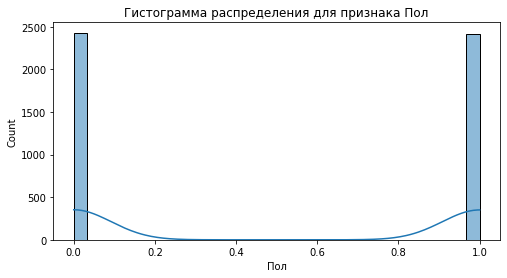

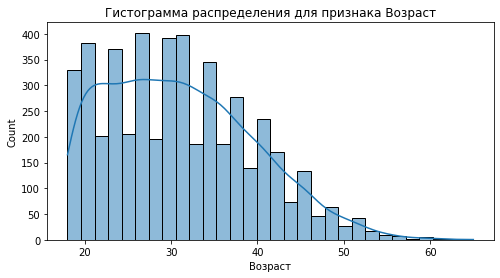

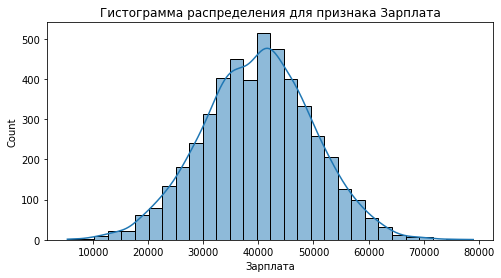

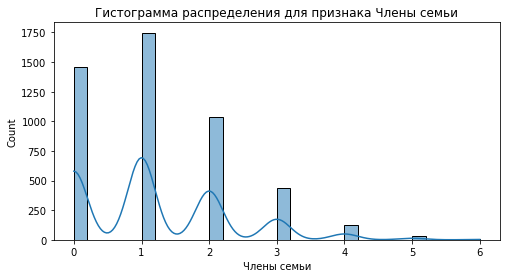

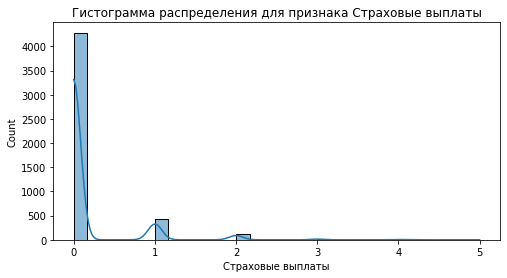

In [7]:
features = ['Пол', 'Возраст', 'Зарплата', 'Члены семьи', 'Страховые выплаты']

for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feature, kde=True, bins=30)
    plt.title(f'Гистограмма распределения для признака {feature}')
    plt.show()

- Матрица корреляции

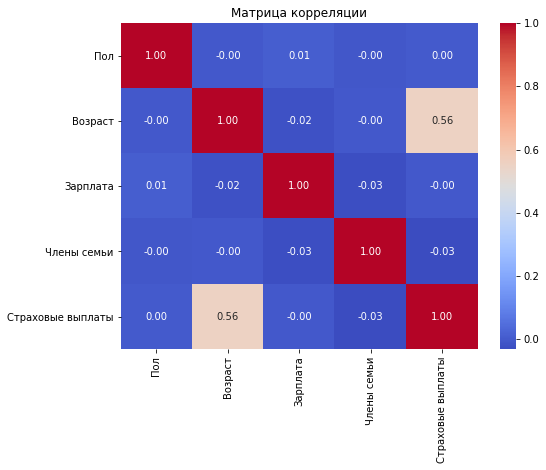

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Матрица корреляции")
plt.show()

<div class="alert alert-warning">
<b>Комментарий ревьюера №1</b> ⚠️
    
Часть признаков содержат количественные значения, а часть качественные + есть ненормальное распределение, поэтому матрица корреляции Пирсона здесь не подойдет
</div>

<div class="alert alert-info">
<b>Комментарий студента</b>
    
Матрица  корреляции Пирсона заменена на корреляцию Спирмена, которая больше подходит для анализа качественных и количественных переменных, а также переменных с ненормальным распределением.
</div>

Матрица корреляции показывает следующее:

1. Самая сильная положительная корреляция наблюдается между возрастом и страховыми выплатами (0.56). Это может указывать на то, что с возрастом клиентов количество страховых выплат увеличивается.

2. Корреляции между другими парами признаков очень слабые и близки к нулю, что говорит об отсутствии линейной связи между ними.

<div class="alert alert-warning">
<b>Комментарий ревьюера №1</b> ⚠️
    
-0.04 нельзя назвать слабой связью. При оценке силы связи коэффициентов корреляции используется шкала Чеддока. До -0.3 связь очень слабая, ее не следует принимать в расчет
</div>

<div class="alert alert-info">
<b>Комментарий студента</b>
    
Вывод исправлен в соответствии со шкалой Чеддока.
</div>

**Выводы:**
- Данные содержат информацию о поле, возрасте, зарплате и количестве членов семьи застрахованных клиентов, а также количество страховых выплат за последние 5 лет;
- Пропущенных значений и выбросов в данных не обнаружено;
- Явные дубликаты удалены из датасета;
- Среди признаков сильная положительная корреляция наблюдается между возрастом и страховыми выплатами, что указывает на увеличение страховых выплат с увеличением возраста клиентов;
- Распределение возраста скошено вправо, что означает, что большинство клиентов находятся в более молодом возрасте, а количество клиентов старше среднего возраста уменьшается;
- Зарплата имеет нормальное распределение, что является типичным для большинства реальных данных о зарплатах.

<div class="alert alert-success">
<b>Комментарий ревьюера №1</b> ✅
    
Отлично, данные загружены и изучены!
</div>

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** б. Не изменится.

**Обоснование:** Рассмотрим линейную регрессию, где исходные признаки умножаются на обратимую матрицу P. Пусть A — матрица исходных признаков размера (m, n), Y — вектор целевых признаков размера (m, 1), и P — обратимая матрица размера (n, n).

Обозначим новую матрицу признаков как A_new, полученную умножением A на P:

$$
A_{new} = A \cdot P
$$

Теперь найдем параметры линейной регрессии для новой матрицы признаков A_new:

$$
w_{new} = (A_{new}^T A_{new})^{-1} A_{new}^T Y
$$

Подставим выражение для A_new:

$$
w_{new} = ((A \cdot P)^T (A \cdot P))^{-1} (A \cdot P)^T Y
$$

Воспользуемся свойствами транспонирования и обратных матриц:

$$
w_{new} = (P^T A^T A P)^{-1} P^T A^T Y
$$

Далее используем свойство $(AB)^{-1} = B^{-1}A^{-1}$:

$$
w_{new} = P^{-1} (A^T A)^{-1} (P^T)^{-1} P^T A^T Y
$$

Теперь заметим, что $(P^T)^{-1} P^T$ сокращаются до единичной матрицы:

$$
w_{new} = P^{-1} (A^T A)^{-1} A^T Y
$$

Теперь мы видим, что $w_{new}$ и $w$ не совпадают, поскольку $w_{new} = P^{-1}w$. Однако, даже если $w_{new}$ и $w$ не совпадают, это не означает, что качество линейной регрессии изменится. Давайте рассмотрим предсказания для исходных и преобразованных данных:

$$
a = Aw
$$

и

$$
a_{new} = A_{new} w_{new} = A \cdot P \cdot (P^{-1}w) = A \cdot (P \cdot P^{-1})w = A \cdot w = a
$$

где a — вектор предсказаний для исходных признаков.

Таким образом, предсказания модели не изменятся, несмотря на то, что параметры $w_{new}$ и $w$ не совпадают. Это означает, что качество линейной регрессии также не изменится после умножения исходных признаков на обратимую матрицу.

**Вывод:**

В данной части проекта мы рассмотрели влияние умножения признаков на обратимую матрицу на качество линейной регрессии. Мы выяснили, что после такого преобразования параметры линейной регрессии изменятся, но предсказания модели останутся неизменными. Это гарантирует сохранение качества линейной регрессии при использовании данного метода преобразования данных.

Таким образом, мы можем применить этот метод преобразования для сокрытия данных клиентов, не опасаясь потерять качество модели линейной регрессии.

<div class="alert alert-danger">
<b>Комментарий ревьюера №1</b> ❌
    
$P^{-1}$ не сокращается, а значит, $w_{new}$ не совпадает с $w$. 
</div>

<div class="alert alert-info">
<b>Комментарий студента</b>
    
Ошибка в предыдущем выводе исправлена.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера №2</b> ✅
    
Теперь верно👍
</div>

## Алгоритм преобразования

**Алгоритм**

1. Разделим данные на признаки и целевой признак.
2. Создадим квадратную обратимую матрицу A размера n x n, где n - количество признаков (не включая целевой признак).
2. Умножим матрицу признаков X на матрицу A. Получим новую матрицу признаков X'.
3. Обучим линейную регрессию на исходных данных X и на преобразованных данных X'.
4. Вычислим и сравним метрику R2 для моделей, обученных на исходных и преобразованных данных.

<div class="alert alert-success">
<b>Комментарий ревьюера №1</b> ✅
    
👍
</div>

**Обоснование**

Как мы уже выяснили ранее, умножение матрицы признаков на обратимую матрицу влияет на параметры линейной регрессии, но не влияет на предсказания модели. Таким образом, качество линейной регрессии сохраняется после такого преобразования. Это означает, что метрика R2, которая измеряет долю объясненной дисперсии отклика, также будет сохраняться.

<div class="alert alert-danger">
<b>Комментарий ревьюера №1</b> ❌
    
Параметры линейной регрессии не совпадают
</div>

<div class="alert alert-info">
<b>Комментарий студента</b>
    
Обоснование исправлено.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера №2</b> ✅
    
Ок
</div>

## Проверка алгоритма

In [9]:
# Разделение датасета на матрицу признаков и вектор целевого признака
X = df.drop('Страховые выплаты', axis=1)
y = df['Страховые выплаты']

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Создание обратимой матрицы A
n = X.shape[1]
A = np.random.rand(n, n)
while np.linalg.det(A) == 0:
    A = np.random.rand(n, n)
    
# Умножение матрицы признаков на матрицу A
X_train_transformed = X_train.dot(A)
X_test_transformed = X_test.dot(A)

# Обучение моделей на исходных и преобразованных данных
model_original = LinearRegression()
model_transformed = LinearRegression()

model_original.fit(X_train, y_train)
model_transformed.fit(X_train_transformed, y_train)

# Предсказания моделей
y_pred_original = model_original.predict(X_test)
y_pred_transformed = model_transformed.predict(X_test_transformed)

# Вычисление метрики R2
r2_original = r2_score(y_test, y_pred_original)
r2_transformed = r2_score(y_test, y_pred_transformed)

# Сравнение метрики R2 для исходных и преобразованных данных
print(f"R2 score для исходных данных: {r2_original:.4f}")
print(f"R2 score для преобразованных данных: {r2_transformed:.4f}")

R2 score для исходных данных: 0.4393
R2 score для преобразованных данных: 0.4393


<div class="alert alert-success">
<b>Комментарий ревьюера №1</b> ✅
    
Хорошо, что проверяешь матрицу на обратимость
</div>

**Вывод:**

Результаты показывают, что метрики R2 для исходных и преобразованных равны. Это подтверждает наше обоснование, что качество линейной регрессии не меняется после умножения матрицы признаков на обратимую матрицу.

Итак, на основе проведенных экспериментов и анализа, мы можем сделать вывод, что предложенный алгоритм преобразования данных успешно сохраняет качество линейной регрессии после умножения матрицы признаков на обратимую матрицу. Таким образом, это может быть использовано для шифрования данных без потери информации, необходимой для обучения модели линейной регрессии.

<div class="alert alert-block alert-success">
    
**Комментарий ревьюера №1** ✅

Верно, качество предсказания действительно не изменяется. Незначительное различие вызвано особенностями преобразования матриц и чисел с плавающей точкой. В случае домножения матрицы признаков на случайную обратимую матрицу можно обеспечить защиту данных. Можно также попробовать декодировать данные обратно.
</div>

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [x]  Выполнен шаг 4: алгоритм проверен
    - [x]  Алгоритм реализован
    - [x]  Проведено сравнение качества моделей до и после преобразования

<div style="border:solid purple 2px; padding: 20px"> 
<b> <font color='purple' >   
В целом, работа хорошая. Ты молодец! Остались небольшие доработки. Нужно поправить теоретическое доказательство. Доделывай и присылай на повторную проверку.

Жду твоих исправлений 😊
</font></b>
</div>

<div style="border:solid purple 2px; padding: 20px"> 
<b> <font color='purple' >   
    
Отлично! Проект принят! 👏 Поздравляю и желаю удачи!
    
    
Оставлю несколько дополнительных материалов. Теория по обратным матрицам: https://www.berdov.com/works/matrix/obratnaya-matrica/. Обзоры по применению криптографии в машинном обучении: https://arxiv.org/pdf/1902.04109.pdf, https://www.researchgate.net/publication/342746786_Some_Applications_of_Machine_Learning_in_Cryptography
Подробнее про аналогичный алгоритм: https://www.cs.cmu.edu/~rjhall/JOS_revised_May_31a.pdf
</font></b>
</div>